In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv(r"Titanic_train.csv")
test=pd.read_csv(r"Titanic_test.csv")

In [4]:
# STEP 1: Load data
train=pd.read_csv(r"Titanic_train.csv")

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
print("Train shape:", train.shape)

Train shape: (891, 12)


In [7]:
print(train.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
print('\nMissing values:')
print(train.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# STEP 2: EDA

##### Histogram

<Figure size 1000x800 with 0 Axes>

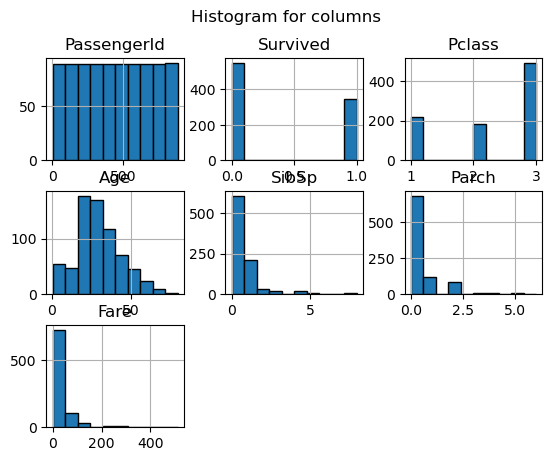

In [17]:
plt.figure(figsize=(10,8))
train.hist(bins=10,edgecolor='black')
plt.suptitle("Histogram for columns")
plt.show()

#### Boxplot

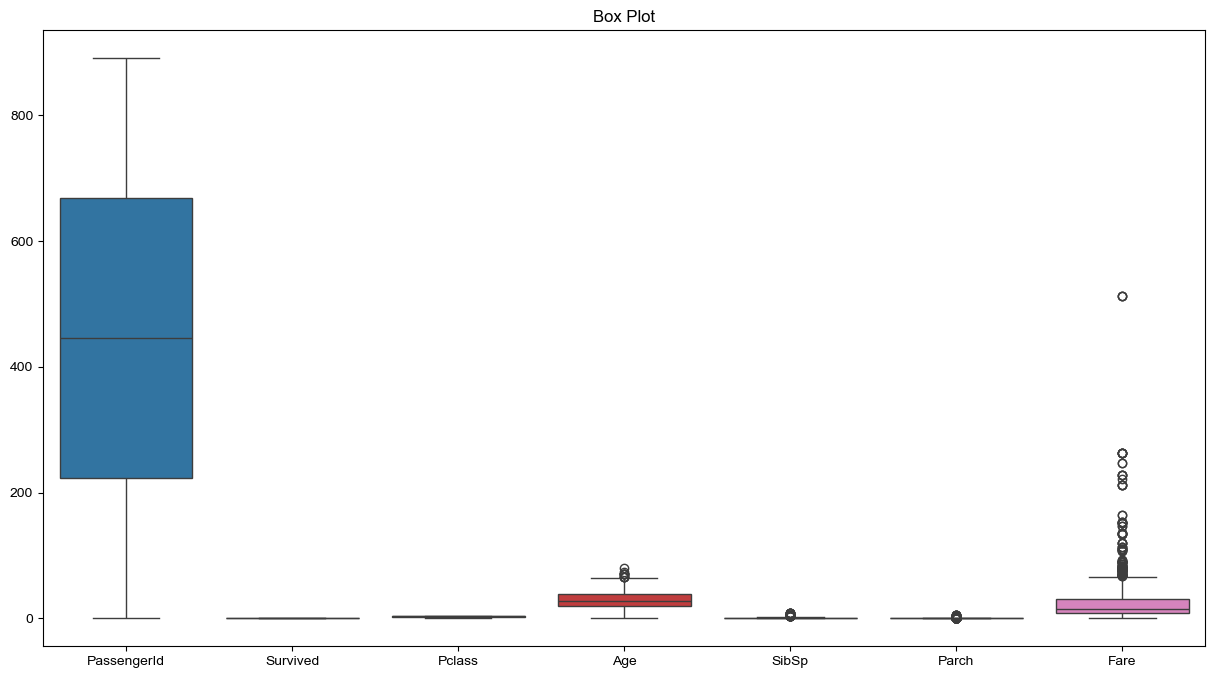

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=train)
plt.title('Box Plot')
sns.set_style("darkgrid")

#### Pairplot

<Figure size 1000x1000 with 0 Axes>

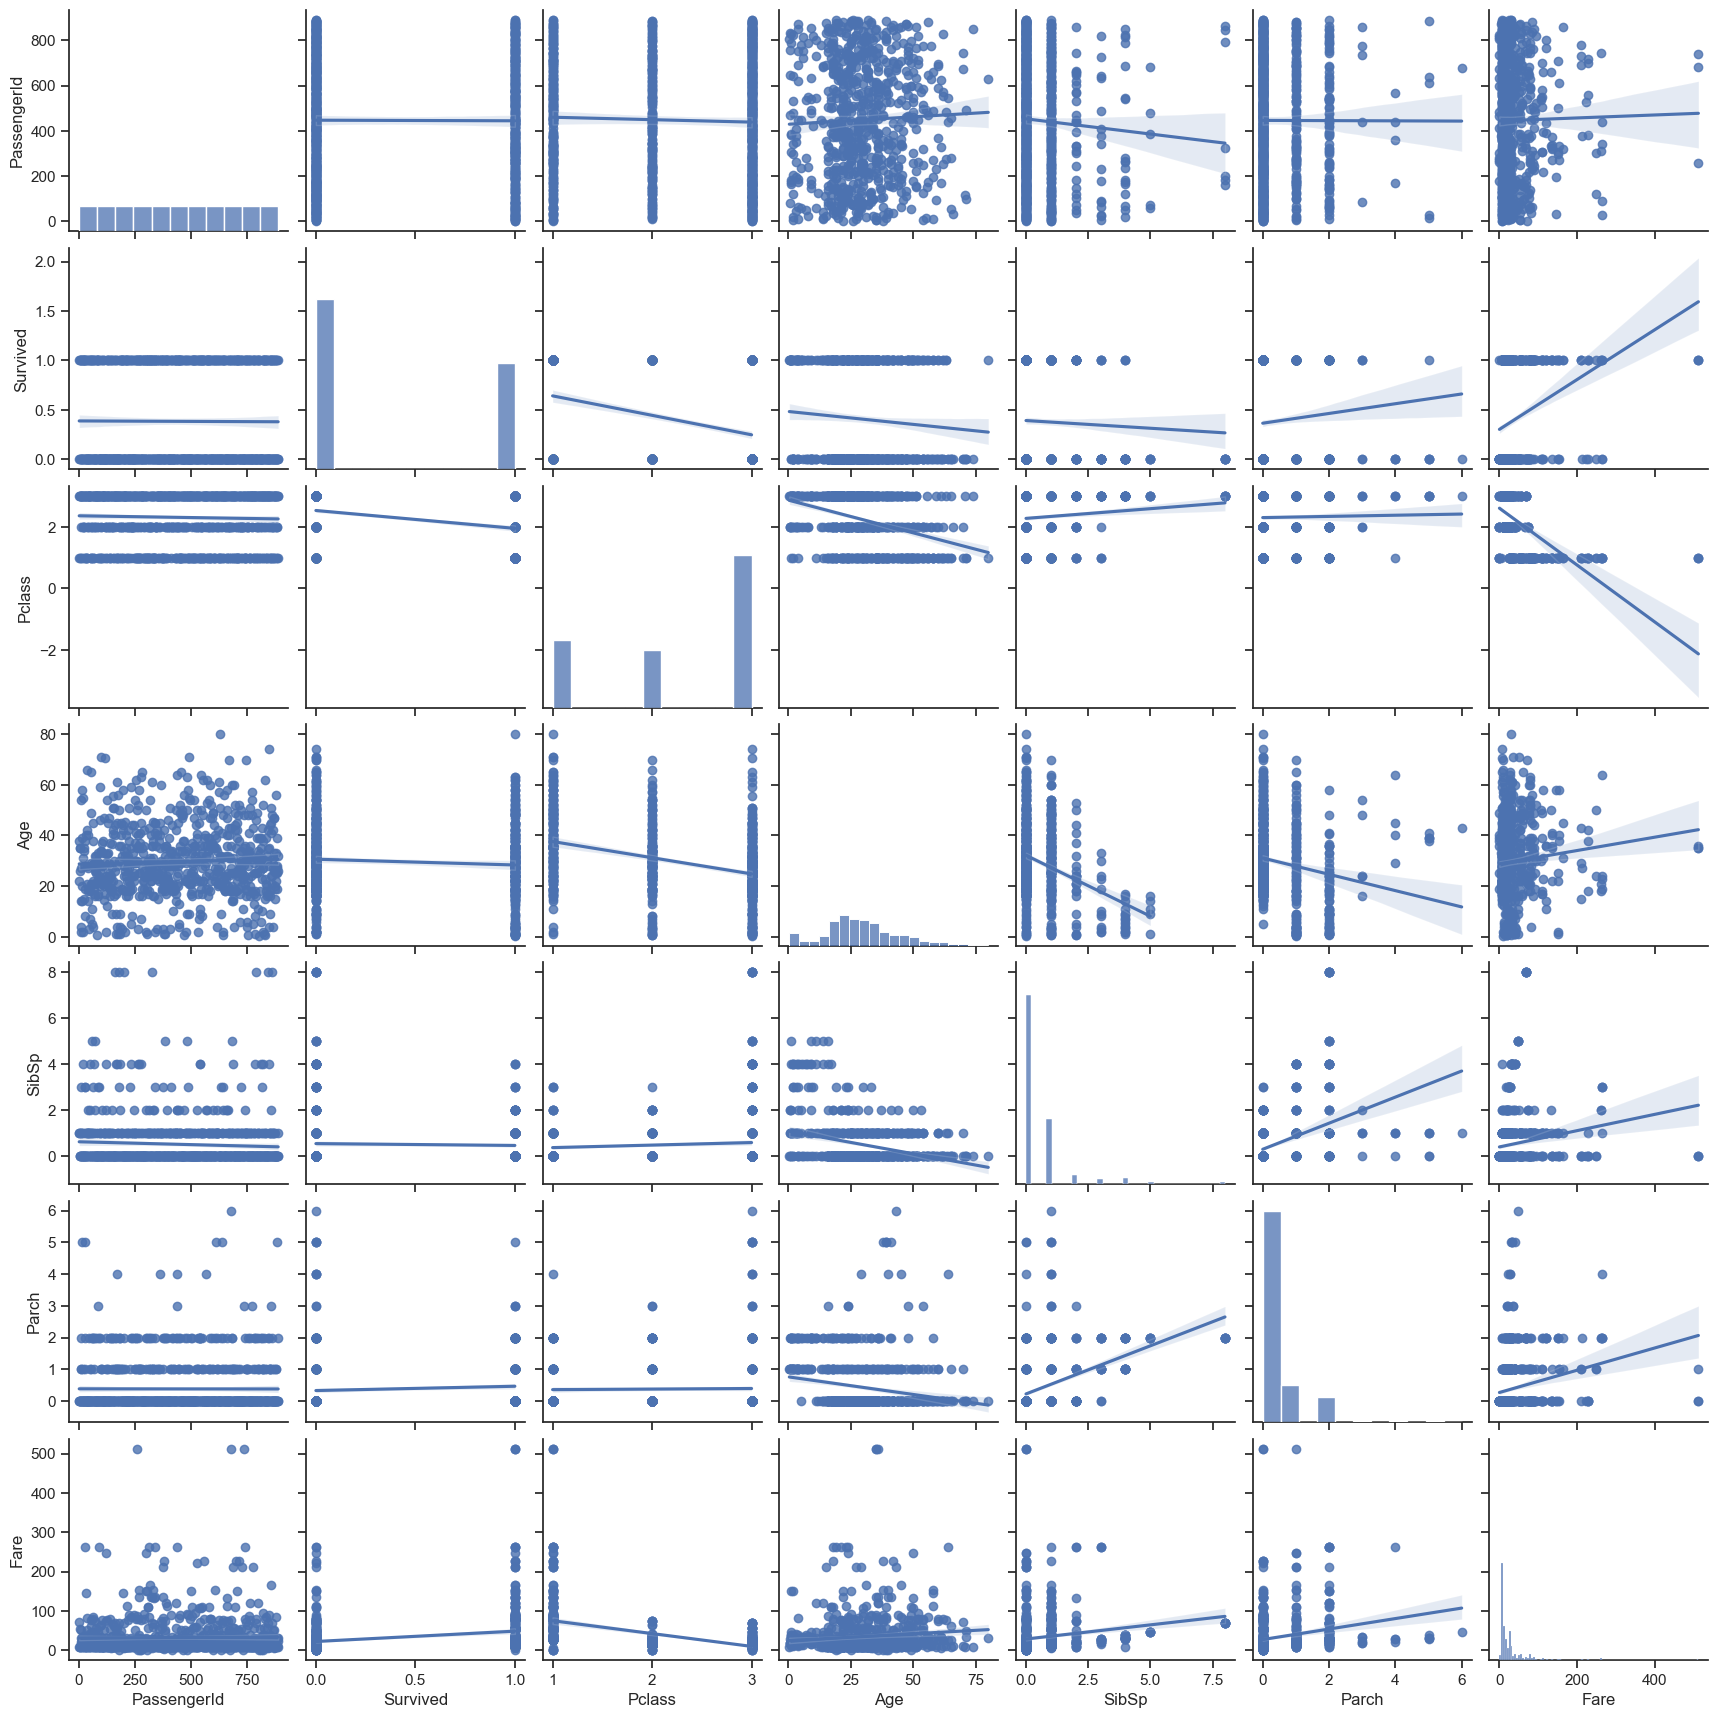

In [20]:
plt.figure(figsize=(10, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(train,kind="reg")
plt.show()

#### Barplot

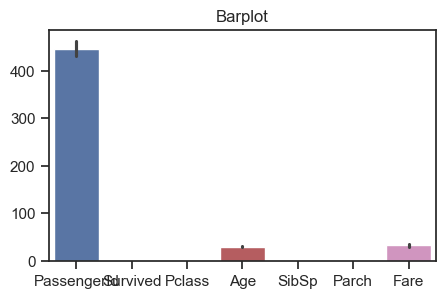

In [21]:
plt.figure(figsize=(5,3))
sns.barplot(data=train)
plt.title('Barplot')
plt.show()

In [22]:
#STEP 3: Preprocessing

In [23]:
# We'll use a few columns that are easy to explain:
# Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [24]:
df = train.copy()

In [25]:
# 1) Fill missing values
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15716\1809598565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [26]:
# Embarked has a few missing -> fill with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15716\2937120972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [28]:
# Fare: fill if any missing
if df['Fare'].isnull().sum() > 0:
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [32]:
# 2) Simple encoding for Sex
# map male -> 0, female -> 1 
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Sex'] 

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: Sex, Length: 891, dtype: float64

In [30]:
# 3) One-hot encode Embarked (drop_first keeps model simpler)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,False,False


In [33]:
# 4) Choose features and target
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [34]:
# add any Embarked_* columns created by get_dummies
feature_cols += [c for c in df.columns if c.startswith('Embarked_')]

In [35]:
X = df[feature_cols]

In [36]:
y = df['Survived']

In [37]:
print('\nFeatures used:\n', feature_cols)
print('\nSample X:')
print(X.head())


Features used:
 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']

Sample X:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3  NaN  22.0      1      0   7.2500       False        True
1       1  NaN  38.0      1      0  71.2833       False       False
2       3  NaN  26.0      0      0   7.9250       False        True
3       1  NaN  35.0      1      0  53.1000       False        True
4       3  NaN  35.0      0      0   8.0500       False        True


In [38]:
#STEP 4: split the model

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,train_size=0.8)

In [43]:
# STEP 5: Build models (LightGBM and XGBoost)

In [66]:
# LightGBM
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
print(classification_report(y_test,lgb_model.predict(X_test)))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [65]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
print(classification_report(y_test,xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75       105
           1       0.64      0.55      0.59        74

    accuracy                           0.69       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.68      0.69      0.68       179



C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
